# Independent Project: Agglomerative Clustering
## Tavares Holloway ~ 12/13/24

### Step 1: Documentation setup

### Step 2: Claim your work

### Step 3: Research agglomerative clustering
#### A.) What is the definition of agglomerative clustering?
Clustering or Cluster analysis is the task of grouping a set of objects in a way that the objects in the same group (cluster) are more similar, in some aspect, to each other than those in other groups (clusters).

Agglomerative Clustering is a "bottom-up" approach. Each observation, data point, etc. forms its own cluster, and the two closest clusters are merged as one moves up the hierarchy.
#### B.) What are some synonyms of agglomerative clustering?
Hierarchical Clustering and Connectivity-Based Clustering are two synonyms that relay the main themes of agglomerative clustering in an intuitive way.  
#### C.) Find three examples of agglomerative clustering, outside of educational purposes
Outside of just utilizing clustering to learn about it. Currently Spotify applies clustering to group songs and artist for playlists and recommendations. 

Google utilizes agglomerative clustering in image organization and search engine optimization. When grouping similar images via features like faces and objects improves organization. To optimize their engine grouping search queries and webpages with similar meanings or intents increases relevenace and results that align with the users intent.

Similarly to the previous examples, Netflix also implements clustering, specifically for recommendations and content organization. For relevance and reaching the users intent, grouping genres, move titles, and similarities via other features, help the user find what they want easier. In the same way grouping movies and shows by genre also improve the content organization and layout to provide a clearer, focused interface.
#### D.) Which of the following packages have a library specifically for agglomerative clustering?
##### i. PyTorch atleast 2.5
PyTorch does not have any libraries, but it often used in tandem for graphs and models.
##### ii. TensorFlow atleast 2.18
TensorFlow does not have any libraries, but it is also used in tandem for generating embeddings and tensor operations.
##### iii. Keras atleast 3
Keras 3 being part of TensorFlow doesn't have any libraries, but is also used in tandem for building and training the models and feature extraction.
##### iV. scikit-learn atleast 1.5
scikit-learn seems to be the only package out of the four that has specific libraries for agglomerative clustering. There is a function for agglomerative clustering that you can fit to an input.
#### E.) Find atleast two online resources and at least one non-online physical (book) resource
1. https://primo.seattleu.edu/permalink/01ALLIANCE_SEAU/3bmk5g/cdi_askewsholts_vlebooks_9781498785778
2. https://medium.com/@khalidassalafy/agglomerative-hierarchical-clustering-a-study-and-implementation-in-python-fddfdb6a7a64
3. Theory of Agglomerative Hierarchical Clustering by Sadaaki Miyamoto 
#### F.) Identify the type of each resource. Write a sentence on the level of reliability of each resource, relative to this project
1. the first source is an ebook, The reliability of the ebook for a project involving vector data agglomerative clustering is high, as it provides comprehensive coverage of clustering techniques, including advanced methods and quality verification, while also addressing diverse application domains like graphs and social networks, making it valuable for both theoretical understanding and practical implementation.
2. the second source is a website article, the reliability of the website article for a project involving vector data agglomerative clustering is moderate to high, as it provides a general overview of the concept, steps, and practical applications, but the depth and rigor of theoretical insights might not match those found in academic or specialized resources, making it more suitable for introductory or application-focused contexts.
3. the third source is a textbook, the reliability of the book for a project involving vector data agglomerative clustering is high, as it provides a rigorous theoretical foundation, discusses modern methodological advancements (e.g., dendrogram structures, kernel methods), and focuses on practical applications that can enhance the clustering of complex vector data.

### Step 4: Find a data set of 399 or more vectors, labeled or non-labeled
Using kaggle I found a marketing campaign csv, in that csv it contains detailed customer analysis. Containing information like birth year, education, etc. It contains 2240 entries, and 29 columns/information labels.

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

### Step 5: Conduct agglomerative clustering on the data set, reach an interpetable result
For step 5 im following along this notebook that came with the data set to properly cluster it.

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

This walkthrough was helpful in breaking down data manipulation to really pull out the themes and messages we can learn from it. In fact the whole purpose of the notebook was clustering to infer on very specfic parameters that can really tell you alot about the customer.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep="\t") # importing the file but it separated via \t
print("Number of datapoints:", len(data)) # 2240 vectors or different individuals in this case
print(data.columns) # quite a few data labels, mostly numerical but some categorical ones

Number of datapoints: 2240
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [4]:
data = data.dropna() # dropping values that have zeros
print(len(data)) # brings the # of vectors down to 2216

2216


In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True) # converting to datetime so we can calculate customer age
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [6]:
days = []
d1 = max(dates) # the first customer is the oldest
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [7]:
# Adding some additional features by utilizing ones we already have
data["Age"] = 2021 - data["Year_Birth"]

#T otal spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# living situation by marital status
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

# total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

# levels of education
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# renaming weird names
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# removing redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [8]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 800x550 with 0 Axes>

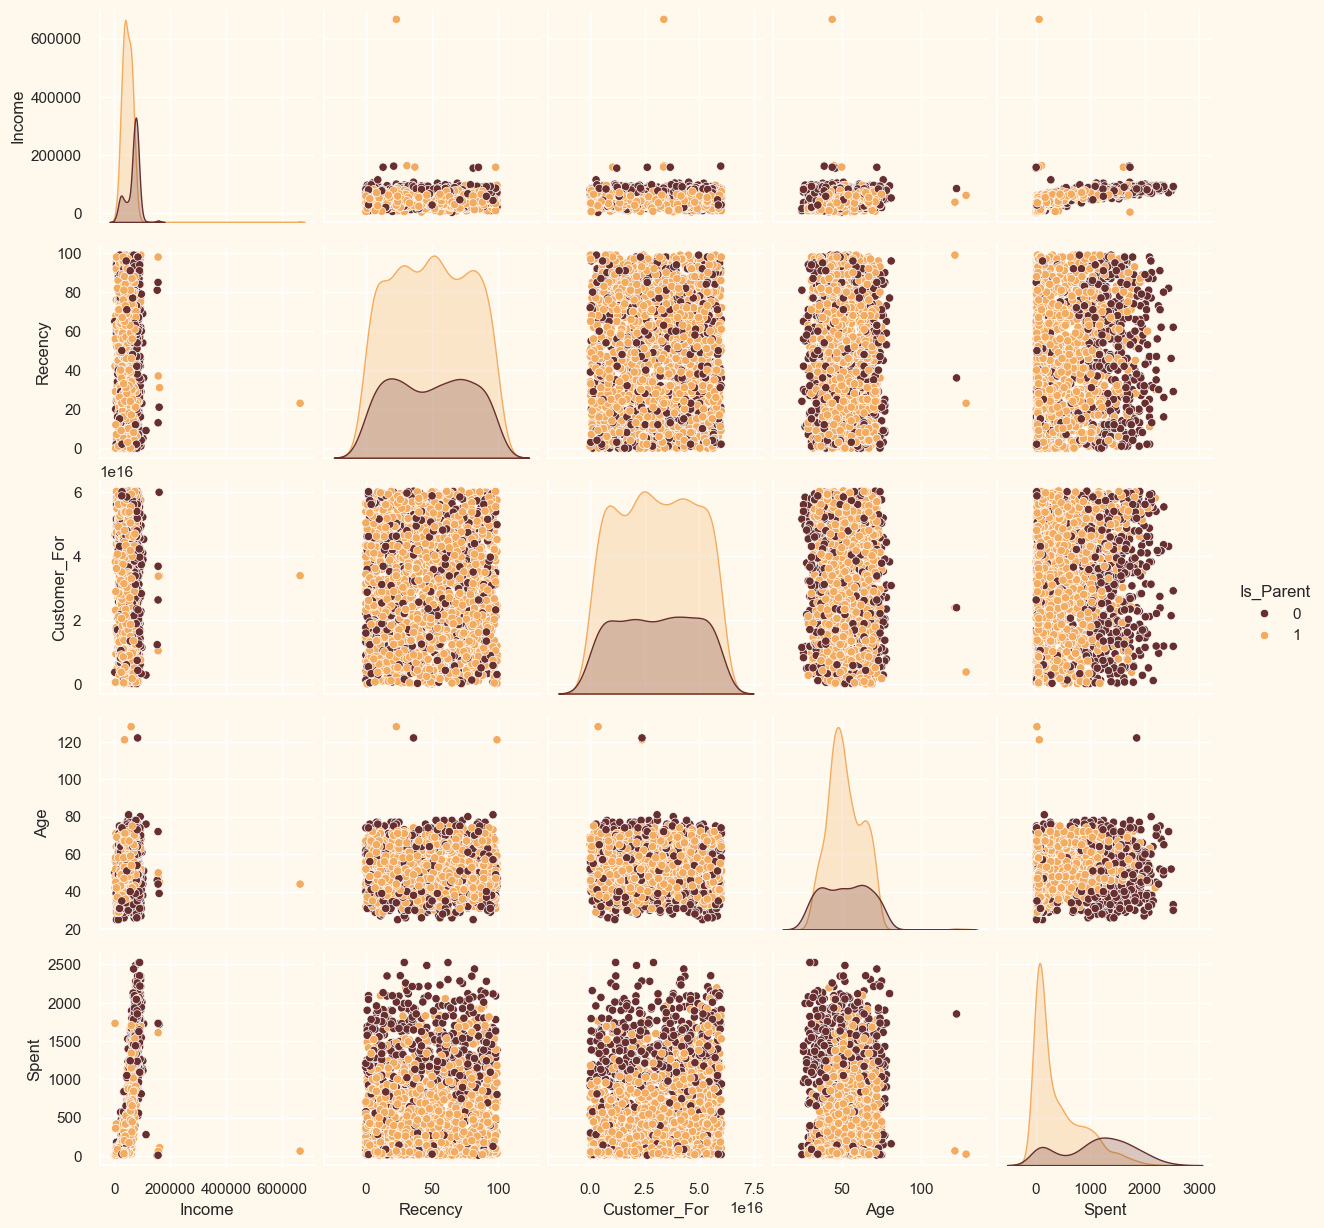

In [9]:
# exploring plotting some features 
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

In [10]:
# removing the outliers
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [11]:
# encoding the categories
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [12]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Scaling the features
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [13]:
# Reduce dimentions / features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,5.139550e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
col3,2212.0,-1.606109e-17,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


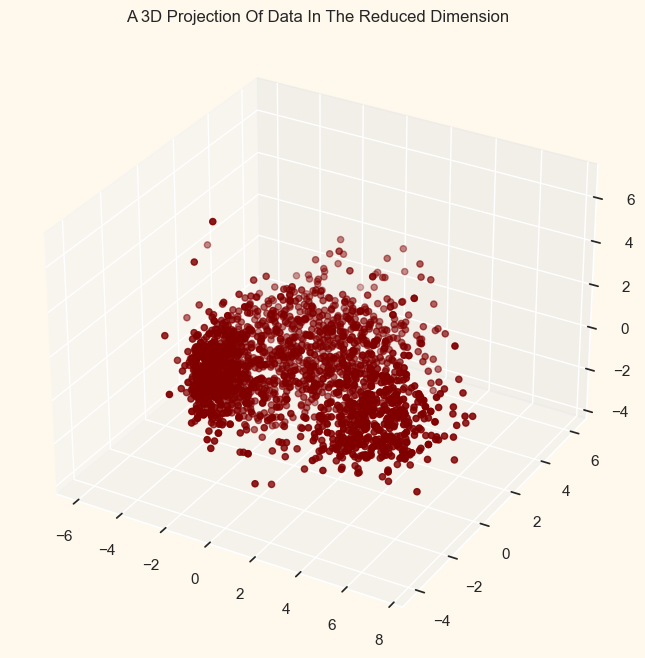

In [14]:
# A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

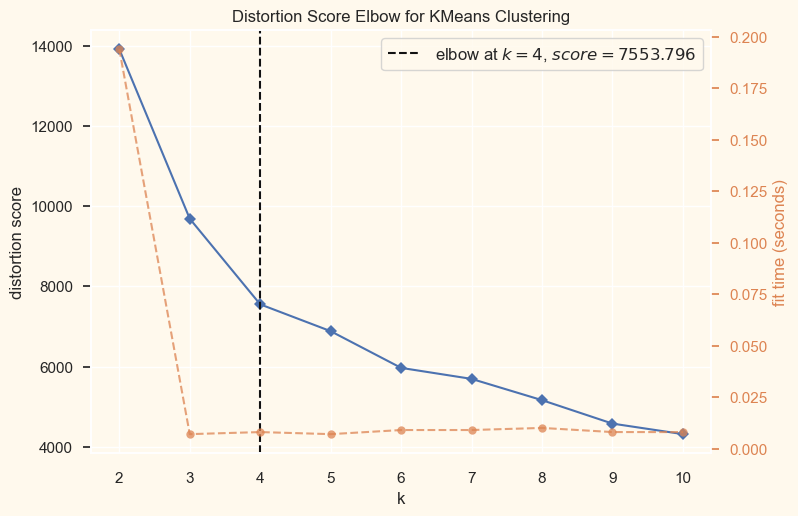

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Utilizing the elbow method to determine the # of clusters to be formed
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [16]:
# Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

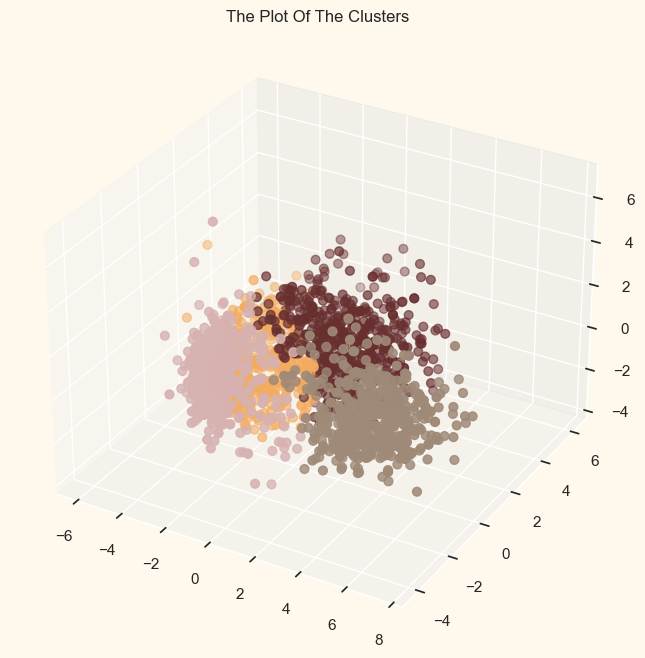

In [17]:
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

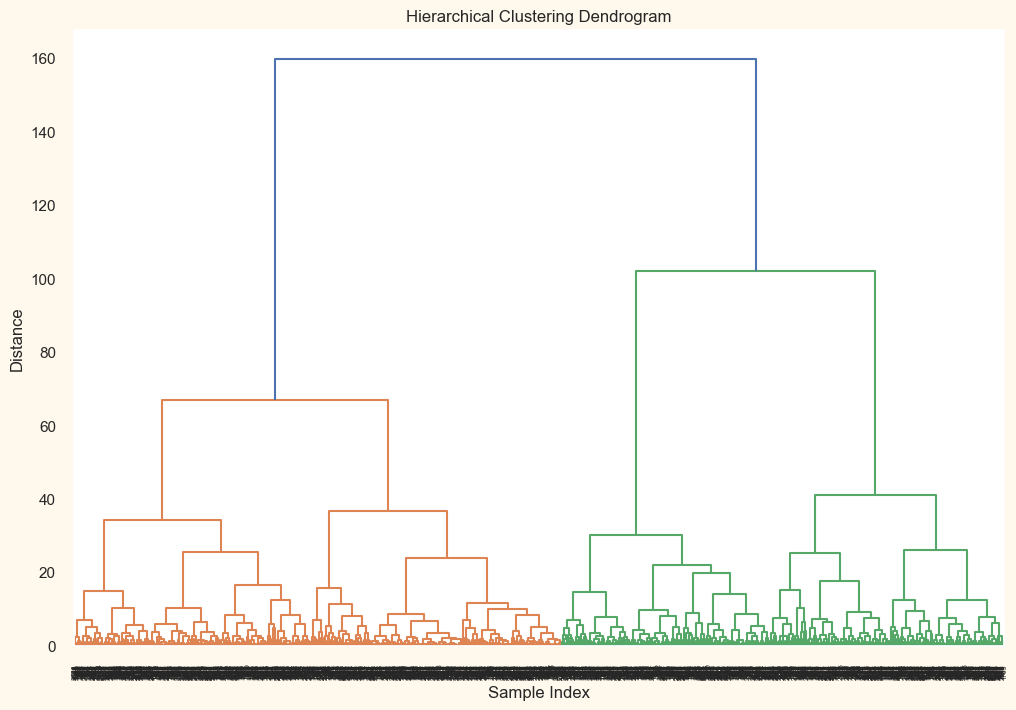

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix
linkage_matrix = linkage(PCA_ds[["col1", "col2", "col3"]], method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=None)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


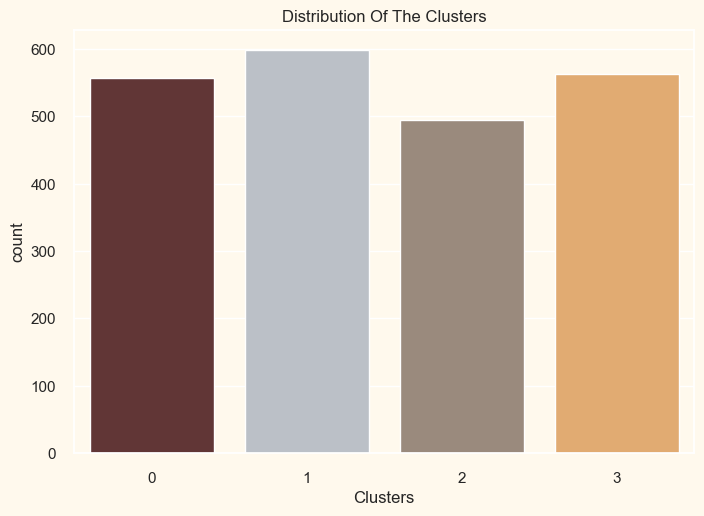

In [19]:
# Plotting a countplot of the clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

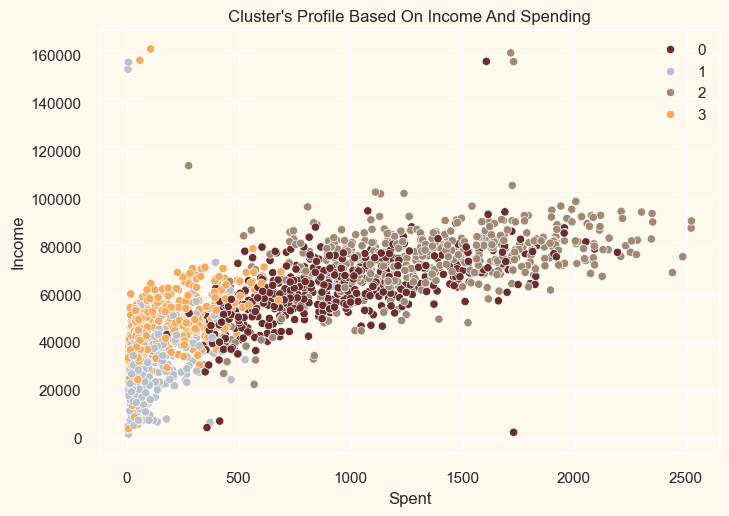

In [26]:
# plots of income and spending based on the clusters
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

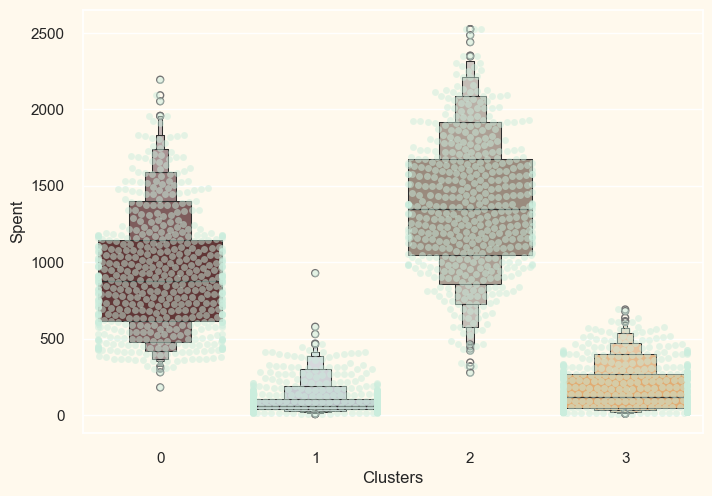

In [21]:
# plots of spending based on the clusters
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

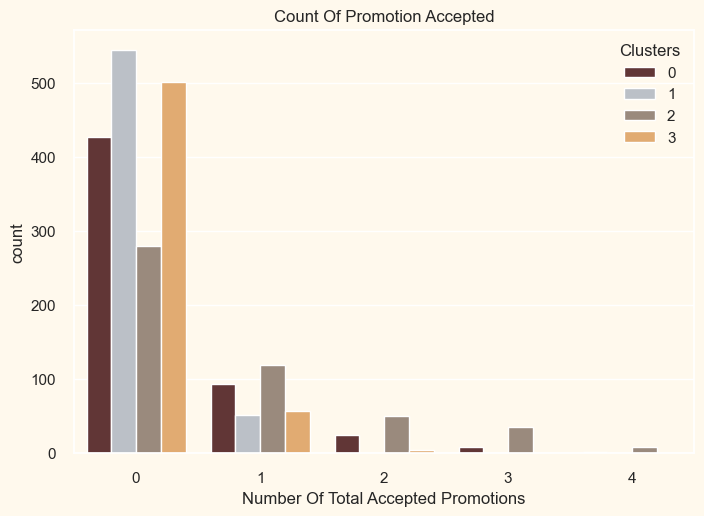

In [22]:
# Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# Plotting count of total campaigns accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

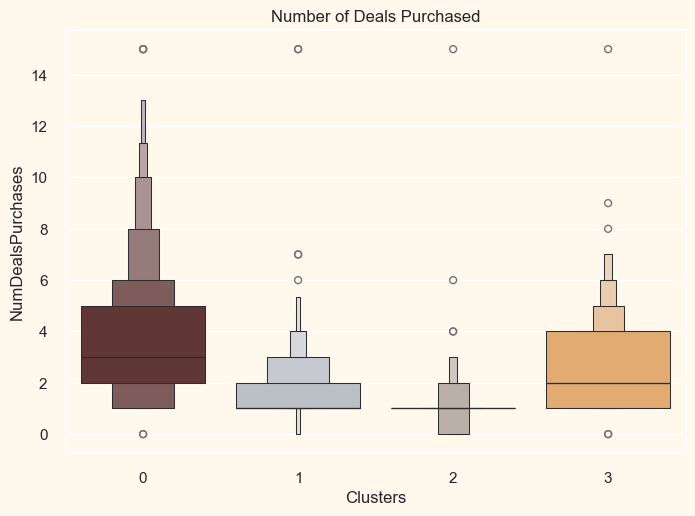

In [23]:
# Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

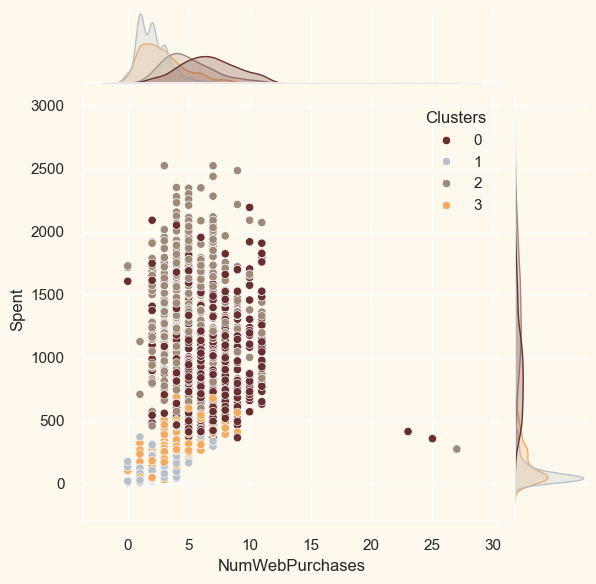

<Figure size 800x550 with 0 Axes>

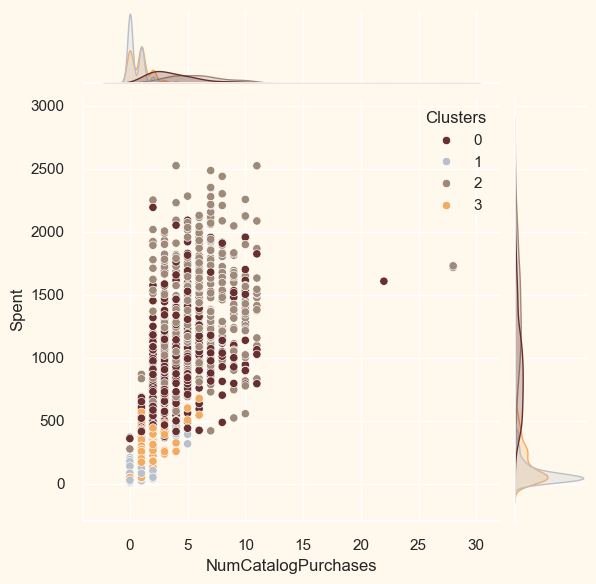

<Figure size 800x550 with 0 Axes>

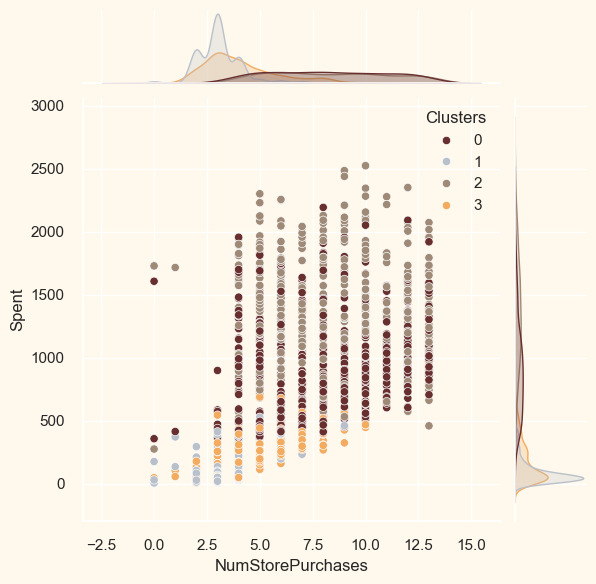

<Figure size 800x550 with 0 Axes>

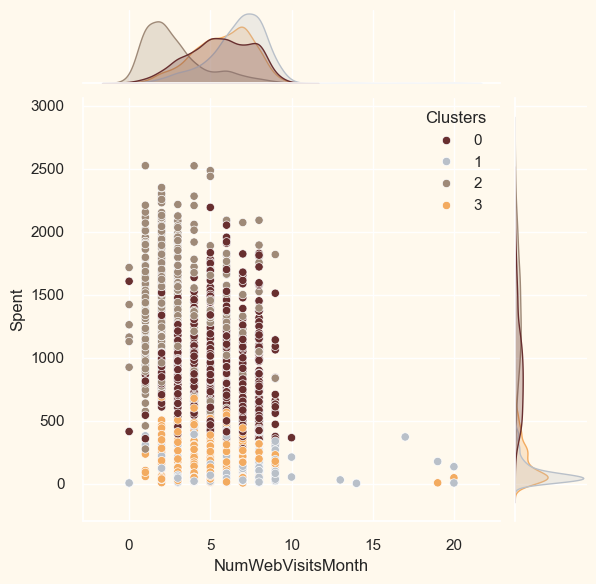

In [24]:
# plotting more specific features on purchases
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<Figure size 800x550 with 0 Axes>

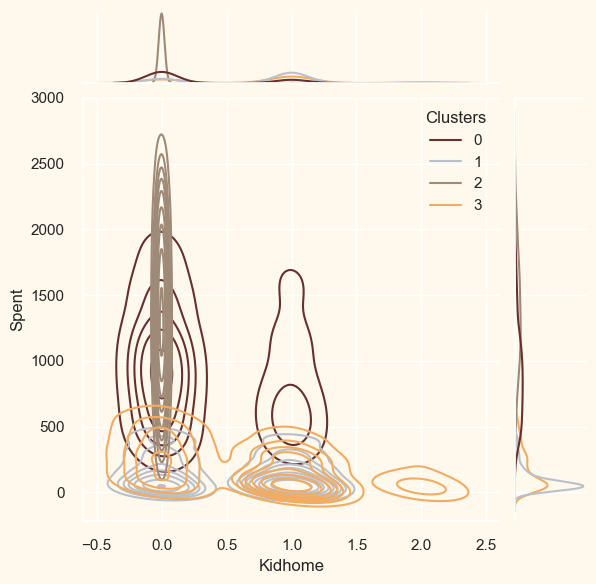

<Figure size 800x550 with 0 Axes>

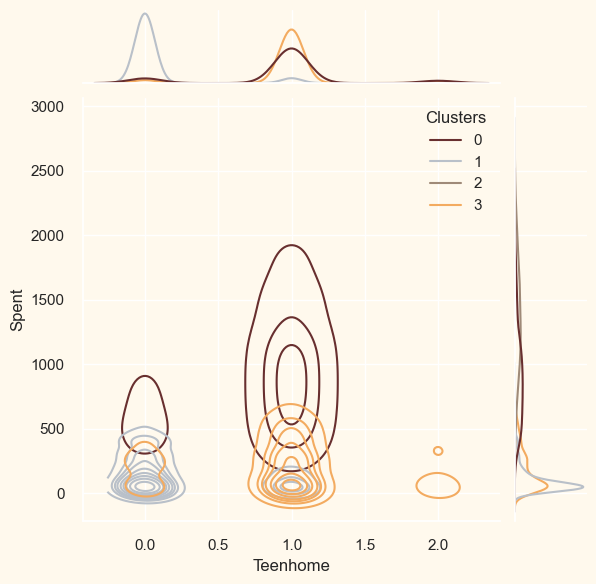

<Figure size 800x550 with 0 Axes>

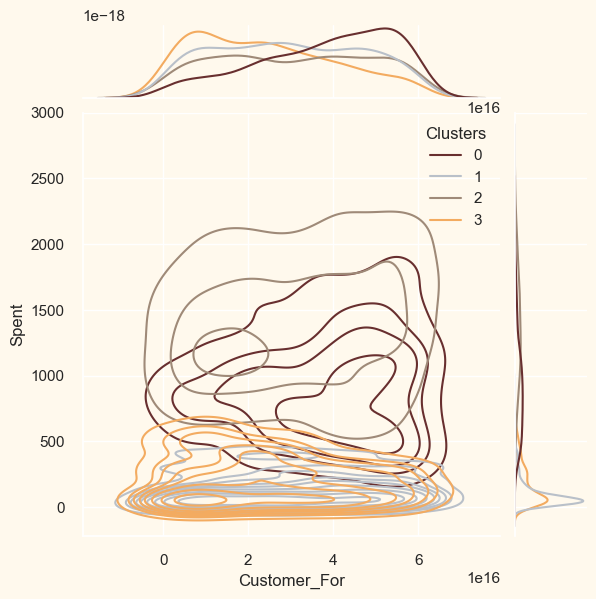

<Figure size 800x550 with 0 Axes>

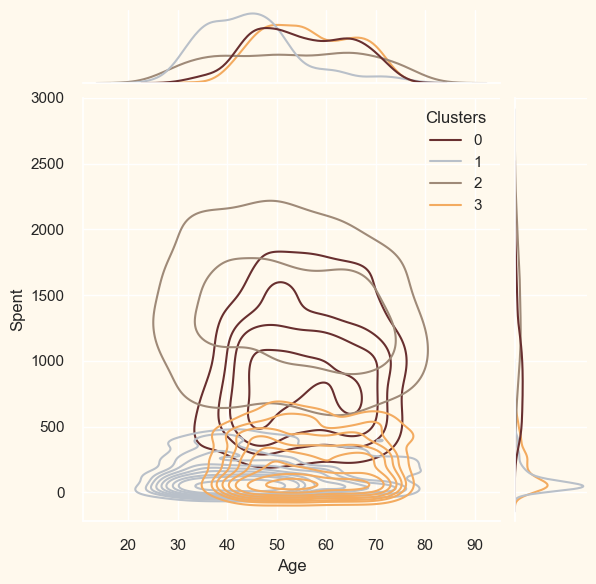

<Figure size 800x550 with 0 Axes>

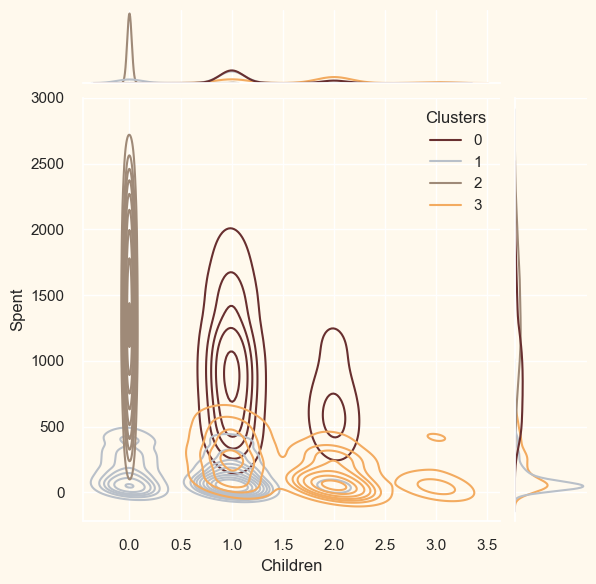

<Figure size 800x550 with 0 Axes>

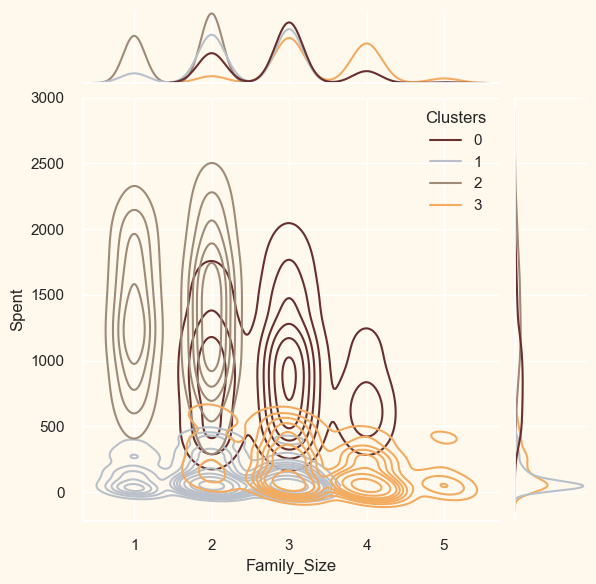

<Figure size 800x550 with 0 Axes>

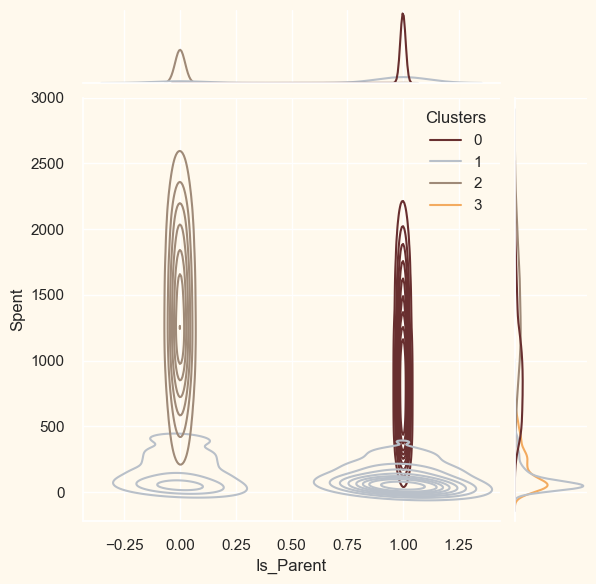

<Figure size 800x550 with 0 Axes>

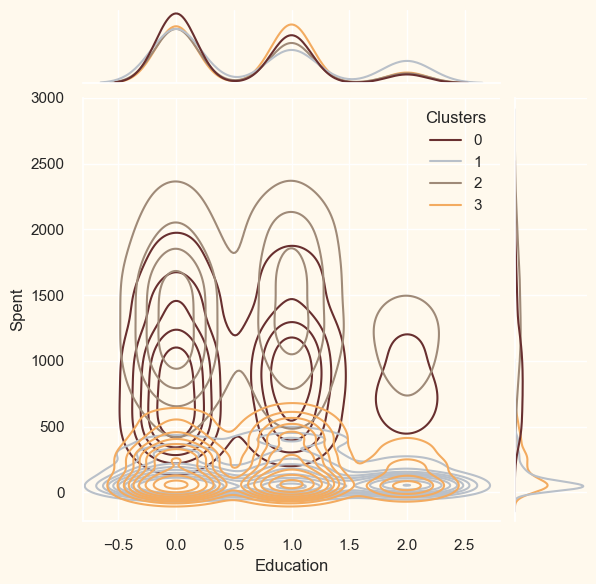

<Figure size 800x550 with 0 Axes>

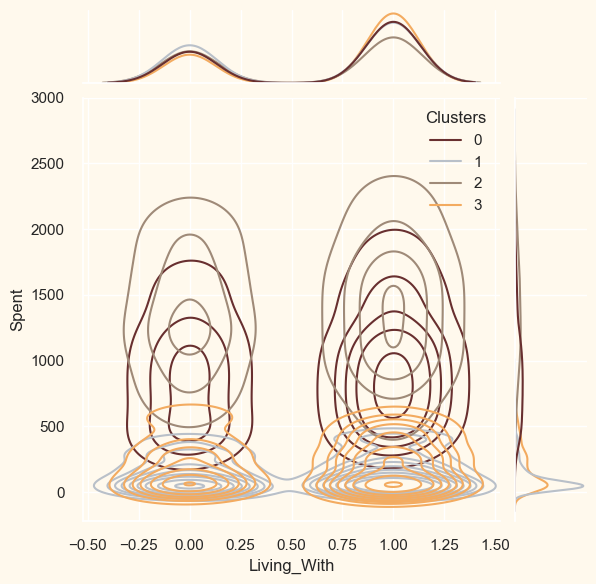

In [25]:
# plotting features related to a family
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

### Universal Step: comment.document so new readers can understand the work

### Sources:
1. https://en.wikipedia.org/wiki/Cluster_analysis
2. https://en.wikipedia.org/wiki/Hierarchical_clustering
3. https://link.springer.com/article/10.1007/s00453-012-9717-4
4. https://medium.com/@dionb/exploring-unsupervised-learning-with-my-spotify-playlist-cdcc3e2ef0b7
5. https://research.google/blog/scaling-hierarchical-agglomerative-clustering-to-trillion-edge-graphs/
6. https://www.geeksforgeeks.org/netflix-movies-tv-show-clustering-using-unsupervised-ml/
7. API websites for each of the packages